<a href="https://colab.research.google.com/github/IsaacFigNewton/NoSKE-Pipeline/blob/main/NoSKE_Pipeline_Test_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get, import dependencies

In [ ]:
# !git install git+https://github.com/IsaacFigNewton/NoSKE-Pipeline.git
!python -m spacy download en_core_web_lg

Cloning into 'NoSKE-Pipeline'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 87 (delta 35), reused 61 (delta 19), pack-reused 0 (from 0)
Receiving objects: 100% (87/87), 202.74 KiB | 1.38 MiB/s, done.
Resolving deltas: 100% (35/35), done.
Processing ./NoSKE-Pipeline
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for noske: filename=noske-0.0.1-py3-none-any.whl size=10342 sha256=2c0fb868492fa21fae8eac1dbe9af813d33edc2b987ea688f37b9b7066bda779
  Stored in directory: /root/.cache/pip/wheels/a8/31/ec/e7d57631805088bb20803701406ce34432109ccae12dd31e6d
  Created wheel for importlib: filename=importlib-1.0.4-py3-none-any.whl size=5850 sha256=be898eeffceaecc597f7d28a26ff5c64f453bbca08838f73b1f11d236c5295c5
  Stored in directory: /root/.cache/pip/whe

# Config

In [2]:
import json
import spacy
import networkx as nx
from noske import SemanticHypergraph, PatternMatcher

In [3]:
nlp = spacy.load('en_core_web_lg')
text = "A dependency relationship describes how one element (the dependent) relies on another element (the supplier) for its functionality or meaning."
doc = nlp(text)

# Construct a dependency KG from the SpaCy token info
See [RDF schema spec docs](https://www.w3.org/TR/rdf-schema/) for edge relation guidance

In [4]:
G = SemanticHypergraph(doc)

## Visualize the KG

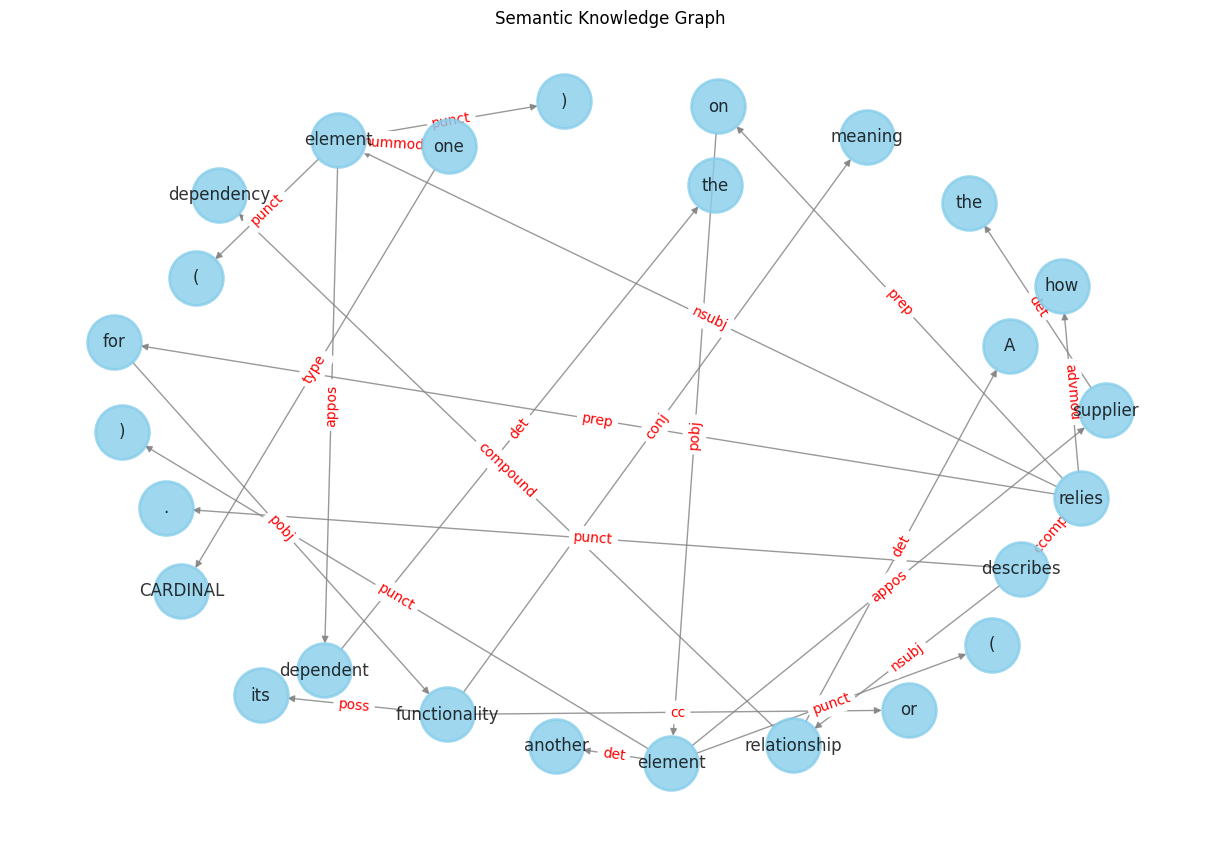

In [5]:
G.plot()

## List nodes, edges

In [6]:
G_json = G.to_json()
print("Nodes")
print(G_json['nodes'])
print()
print("Edges")
print(G_json['edges'])

Nodes
[
    [
        0,
        {
            "text": "A",
            "pos": "DET",
            "head": 2,
            "lemma": "a",
            "case": "upper",
            "type": "word",
            "Definite": [
                "Ind"
            ],
            "PronType": [
                "Art"
            ]
        }
    ],
    [
        1,
        {
            "text": "dependency",
            "pos": "NOUN",
            "head": 2,
            "lemma": "dependency",
            "case": "lower",
            "type": "word",
            "Number": [
                "Sing"
            ]
        }
    ],
    [
        2,
        {
            "text": "relationship",
            "pos": "NOUN",
            "head": 3,
            "lemma": "relationship",
            "case": "lower",
            "type": "word",
            "Number": [
                "Sing"
            ]
        }
    ],
    [
        3,
        {
            "text": "describes",
            "pos": "VERB",
            "

## List other stuff

# Get implied relations from phrase/clause-level structures

In [7]:
matcher = PatternMatcher(G)

## List the default patterns (ensure they loaded correctly)

In [8]:
print(json.dumps(matcher.pattern_loader.patterns, indent=4))

{
    "lexical": {
        "passive_voice": {
            "description": "Find passive voice constructions",
            "pattern": [
                {
                    "root_type": [
                        "NOUN",
                        "PROPN"
                    ]
                },
                {
                    "labels": [
                        "auxpass"
                    ]
                },
                {
                    "root_type": [
                        "VERB"
                    ]
                }
            ]
        },
        "compound_predicate": {
            "description": "Find compound predicates",
            "pattern": [
                {
                    "root_type": [
                        "NOUN",
                        "PROPN"
                    ]
                },
                {
                    "labels": [
                        "subject"
                    ]
                },
                {
                    "

## Try adding a new pattern to the list for matching

In [9]:
pattern = {
    "name": "test_pattern",
    "pattern": [
        {"pos": "VERB"},
        {"type": {"nsubj", "prep"}},
        {"pos": {"PROPN", "ADP"}}
    ]
}
matcher.add_pattern(
    name=pattern["name"],
    pattern=pattern["pattern"],
    description="A test pattern for matching on noun-subject pairs"
)

In [10]:
test_pattern_as_string = json.dumps(
    matcher.pattern_loader.patterns["custom"],
    indent=4,
    default=str
)
print(test_pattern_as_string)

{
    "test_pattern": {
        "description": "A test pattern for matching on noun-subject pairs",
        "pattern": [
            {
                "pos": "VERB"
            },
            {
                "type": "{'nsubj', 'prep'}"
            },
            {
                "pos": "{'ADP', 'PROPN'}"
            }
        ]
    }
}


# Attempt path matching on semantic KG

In [11]:
all_matches = matcher.get_pattern_summary()

Found 2 matches for custom.test_pattern:
	Description: A test pattern for matching on noun-subject pairs
	Pattern: [{'pos': 'VERB'}, {'type': {'nsubj', 'prep'}}, {'pos': {'ADP', 'PROPN'}}]
	[11, 12]
	[11, 19]

